# Artificial Neural Network

In [30]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [9]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# MINST IMAGE --> Tensors

In [10]:
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='.../Data',train=True,download=True,transform=transform)

100.0%


Extracting .../Data/MNIST/raw/train-images-idx3-ubyte.gz to .../Data/MNIST/raw


100.0%


Extracting .../Data/MNIST/raw/train-labels-idx1-ubyte.gz to .../Data/MNIST/raw




100.0%
100.0%


Extracting .../Data/MNIST/raw/t10k-images-idx3-ubyte.gz to .../Data/MNIST/raw

Extracting .../Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to .../Data/MNIST/raw



In [13]:
test_data = datasets.MNIST(root='.../Data',train=False,download=True,transform=transform)

In [15]:
type(test_data)

torchvision.datasets.mnist.MNIST

In [18]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [19]:
image,label = train_data[0]

In [20]:
image.shape

torch.Size([1, 28, 28])

In [21]:
label

5

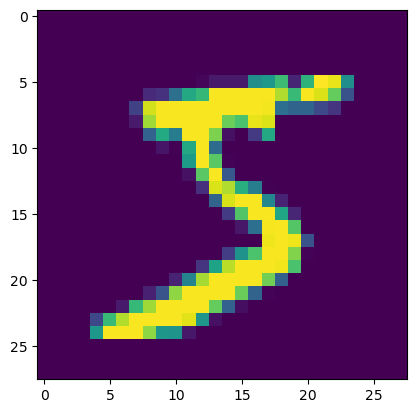

In [22]:
plt.imshow(image.reshape((28,28))) #virdiris

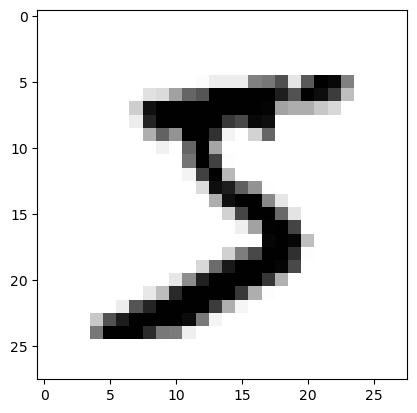

In [26]:
plt.imshow(image.reshape((28,28)),cmap='gist_yarg')

In [39]:
torch.manual_seed(101)

train_loader = DataLoader(train_data,batch_size=100,shuffle=True)

test_loader = DataLoader(test_data,batch_size=500,shuffle=False)

In [67]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))    # FORMATTING

In [68]:
#FIRST BATCH
for images,labels in train_loader:
    #60,000 / 100 60 times
    break

In [64]:
images.shape   # ([number of images, color, with, height])

torch.Size([100, 1, 28, 28])

In [65]:
labels.shape

torch.Size([100])

Labels [   6    9    6    9    9    4    9    6    6    8    3    6]


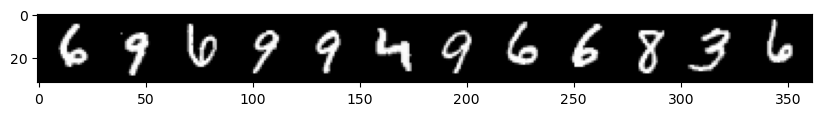

In [66]:
#Print the first 15 labels
print('Labels', labels[:12].numpy())

#Print the first 15 images
im = make_grid(images[:12], nrow=12)
plt.figure(figsize=(10,4))

plt.imshow(np.transpose(im.numpy(), (1,2,0)))

In [69]:
# Artificial Neural Network ANN

In [70]:
class MultilayerPerceptrom(nn.Module):
    
    def __init__(self,in_size=784, out_size=10, layer=[120,84]):
        super().__init__()
        
        self.fc1 = nn.Linear(in_size,layer[0])
        self.fc2 = nn.Linear(layer[0],layer[1])
        self.fc3 = nn.Linear(layer[1],out_size)
        
        
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X,dim=1)

In [72]:
classifier = MultilayerPerceptrom()
classifier

MultilayerPerceptrom(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [73]:
for param in classifier.parameters() :
    print(param.numel())

94080
120
10080
84
840
10


In [74]:
# 105,214 total parameters

In [75]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier.parameters(),lr=0.001)

In [77]:
images.shape # ------> [100,784]

torch.Size([100, 1, 28, 28])

In [79]:
images.view(100,-1).shape

torch.Size([100, 784])

In [80]:
# Set up de training

In [84]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = classifier(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = classifier(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.15828070  accuracy:  94.680%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.13358043  accuracy:  94.877%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.20690636  accuracy:  95.110%
epoch:  1  batch:  200 [ 20000/60000]  loss: 0.11930119  accuracy:  96.225%
epoch:  1  batch:  400 [ 40000/60000]  loss: 0.12452672  accuracy:  96.457%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.15990129  accuracy:  96.508%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.04355349  accuracy:  97.355%
epoch:  2  batch:  400 [ 40000/60000]  loss: 0.07537672  accuracy:  97.395%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.13770729  accuracy:  97.312%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.04375836  accuracy:  97.600%
epoch:  3  batch:  400 [ 40000/60000]  loss: 0.08286126  accuracy:  97.688%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.01439468  accuracy:  97.808%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.03782678  accuracy:  98.410%
epoch:  4  b

In [85]:
# Setup Evaluation

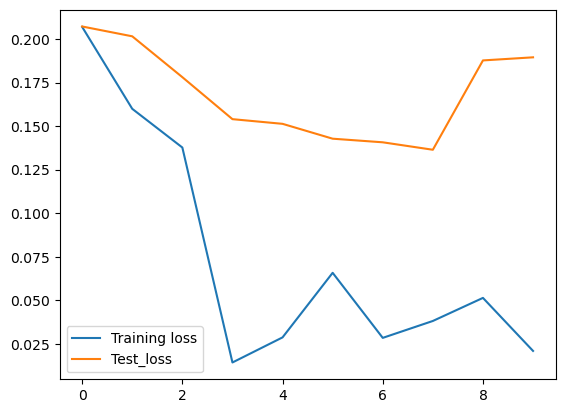

In [89]:
plt.plot(train_losses,label='Training loss')
plt.plot(test_losses, label='Test_loss')
plt.legend()

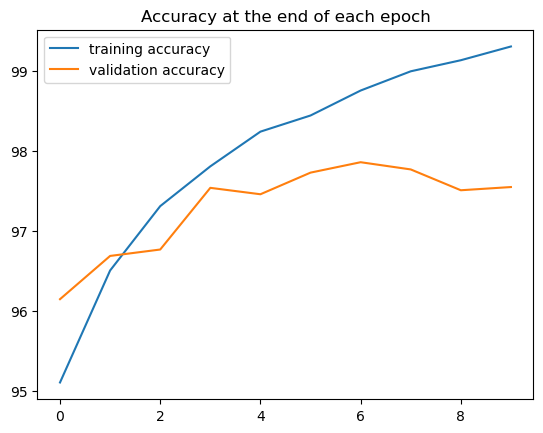

In [92]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [93]:
# NEX UNSEEN DATA

test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [95]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = classifier(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9755/10000 =  97.550%


In [97]:
correct.item()/len(test_data)

0.9755

In [98]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 973    0    6    0    1    2    6    0    6    2]
 [   0 1127    1    1    0    0    3    1    1    5]
 [   0    2 1001    2    3    0    0    9    6    0]
 [   3    1    9  994    1   15    1    1   14    5]
 [   0    0    1    1  952    0    5    0    2    8]
 [   1    0    0    0    1  867   13    0    6    2]
 [   0    1    1    0    2    1  927    0    1    0]
 [   0    1    8    6   10    1    1 1007    4   10]
 [   2    3    4    4    1    2    2    3  932    2]
 [   1    0    1    2   11    4    0    7    2  975]]
